# Student Performance Prediction

## Overview

Predicting student academic performance is a critical task in educational data mining, enabling educators to identify key factors that influence learning outcomes and tailor interventions effectively.

This project analyzes a comprehensive student performance dataset obtained from [here](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression), containing records of 10,000 students and multiple predictors related to study habits, lifestyle, and prior academic achievement.

---

## Objective

- Perform exploratory data analysis (EDA) to understand trends and relationships in the data.
- Preprocess and prepare data for modeling.
- Fit and interpret a multiple linear regression model.
- Evaluate model performance using appropriate metrics.
- Derive actionable insights based on model coefficients.

---

## Skills Highlighted

- Data wrangling and visualization with `pandas`, `matplotlib`, `seaborn`
- Linear regression modeling with `scikit-learn`
- Statistical interpretation of regression coefficients
- Model evaluation using MAE, MSE, RMSE, and R²
- Clear, explainable modeling workflow suitable for real-world use

## Dataset Description

The dataset contains 10,000 student records with the following variables:

- **Hours Studied:** Total hours spent studying.  
- **Previous Scores:** Scores from previous tests.  
- **Extracurricular Activities:** Participation status (Yes/No).  
- **Sleep Hours:** Average hours of sleep per day.  
- **Sample Question Papers Practiced:** Number of sample papers practiced.  
- **Performance Index:** Target variable measuring academic performance (scaled 10–100).


| Feature                        | Description                                |
|-------------------------------|--------------------------------------------|
| Hours Studied                 | Total number of hours a student studied     |
| Previous Scores              | Scores obtained on previous assessments     |
| Extracurricular Activities   | Whether the student participates (Yes/No)  |
| Sleep Hours                 | Average hours of sleep per day               |
| Sample Question Papers Practiced | Number of sample question papers completed |

The **target variable** is:

- **Performance Index:** A numeric score (10–100) representing the overall academic performance.

## Import Libraries and Load Dataset

We start by importing necessary libraries and loading the dataset from a CSV file.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

df = pd.read_csv('Student_Performance.csv')
df.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


## Exploratory Data Analysis (EDA)

Before modeling, understanding data distribution, detecting outliers, and examining relationships between variables are crucial.

Key steps taken:

- **Data quality check:** No missing values found, which simplifies preprocessing.  
- **Distribution analysis:** Most numeric features approximately normally distributed, except slight skewness in Sample Question Papers Practiced.  
- **Categorical variable encoding:** ‘Extracurricular Activities’ mapped to binary for modeling.  
- **Correlation matrix:** Strong positive correlation between Hours Studied and Performance Index observed, aligning with educational theory.

---

Visualizations below help convey these insights clearly.


In [2]:
print("Dataset information:")
df.info()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [3]:
print("Missing values count per feature:")
print(df.isnull().sum())

Missing values count per feature:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [4]:
print("Summary statistics:")
print(df.describe())

Summary statistics:
       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.000000   
50%         5.000000        69.000000      7.000000   
75%         7.000000        85.000000      8.000000   
max         9.000000        99.000000      9.000000   

       Sample Question Papers Practiced  Performance Index  
count                      10000.000000       10000.000000  
mean                           4.583300          55.224800  
std                            2.867348          19.212558  
min                            0.000000          10.000000  
25%                            2.000000          40.000000  
50%                            5.000000          55.000000  
75%                            7.000000          71.00000

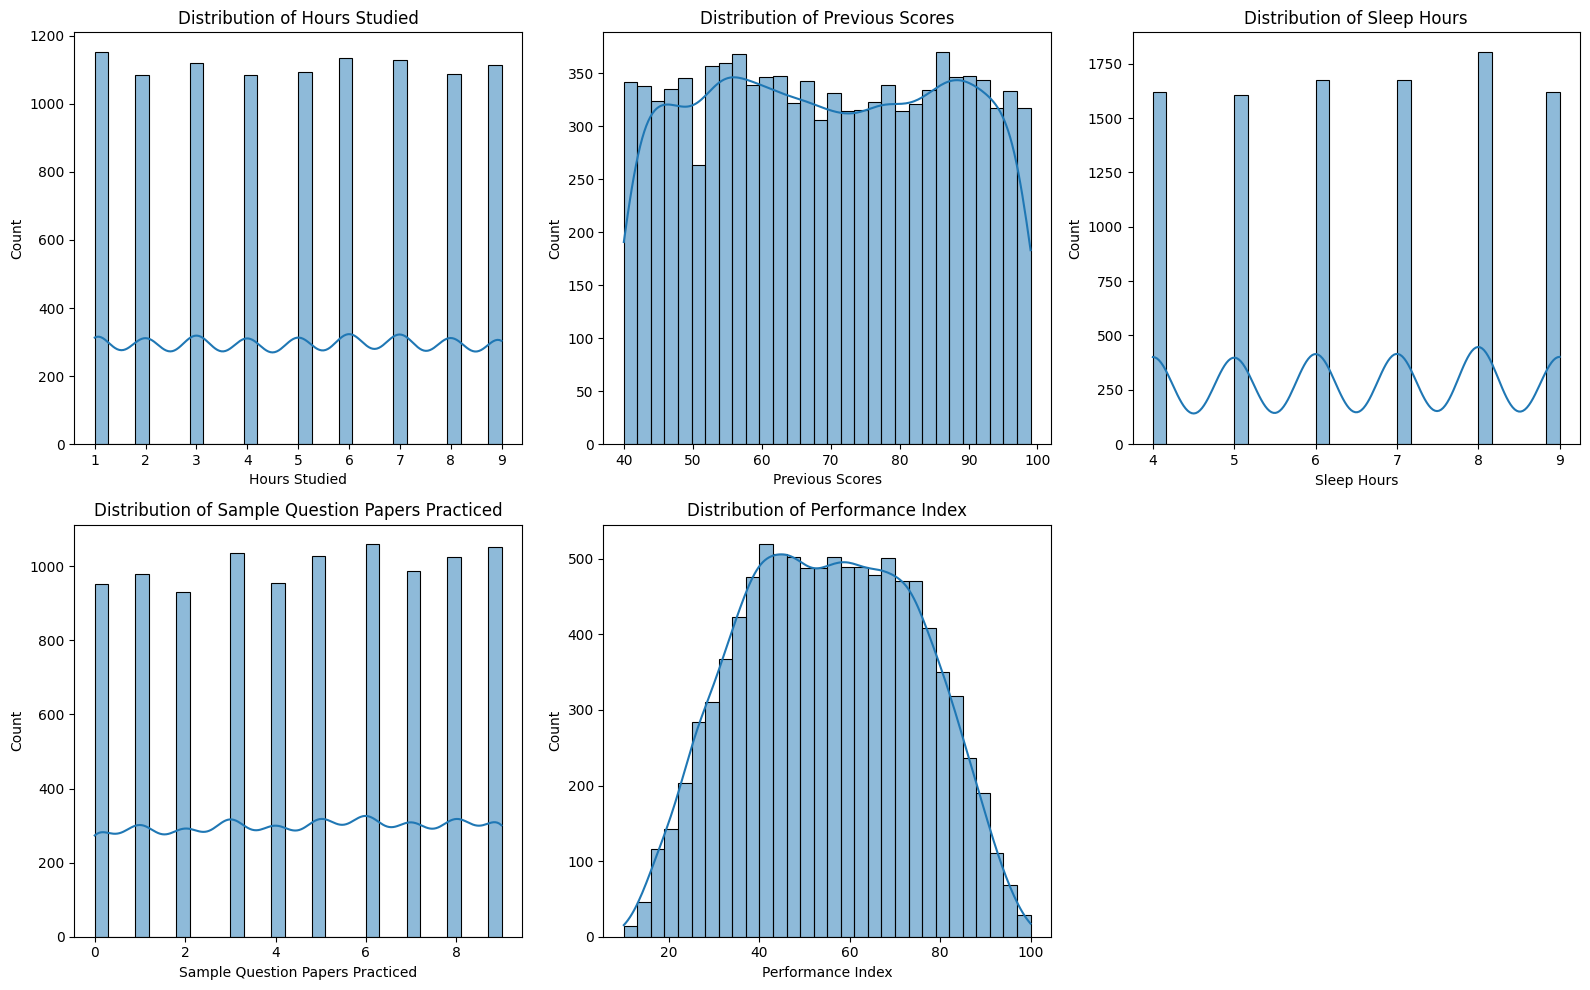

In [5]:
# Distribution plots
plt.figure(figsize=(16,10))
for i, col in enumerate(['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'], 1):
    plt.subplot(2,3,i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

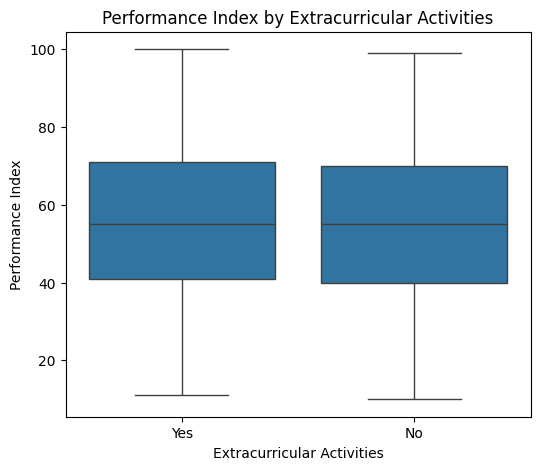

In [6]:
# Boxplot: Performance Index vs Extracurricular Activities
plt.figure(figsize=(6,5))
sns.boxplot(x='Extracurricular Activities', y='Performance Index', data=df)
plt.title('Performance Index by Extracurricular Activities')
plt.show()

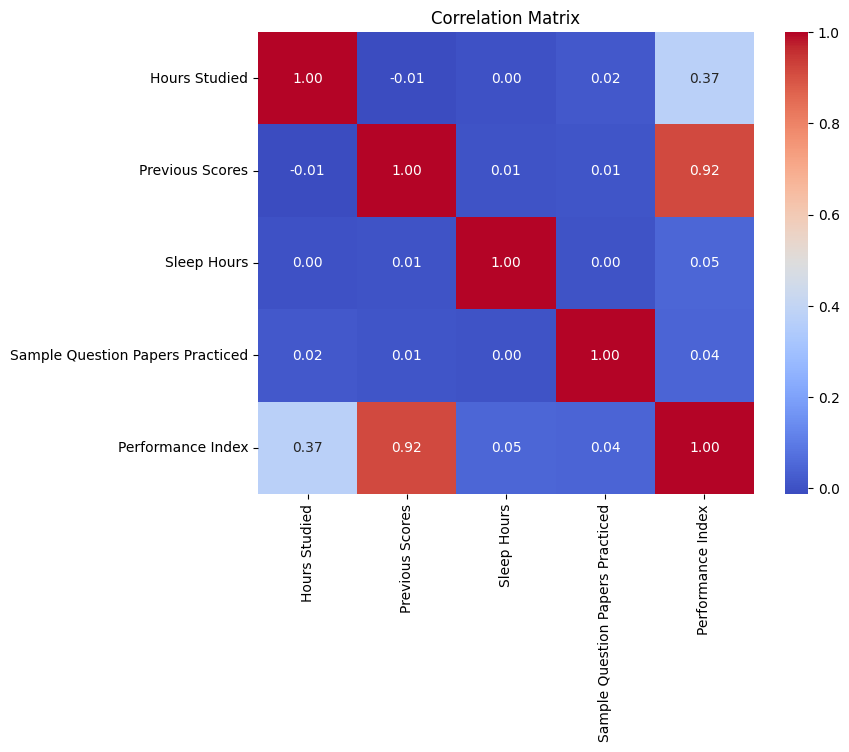

In [7]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

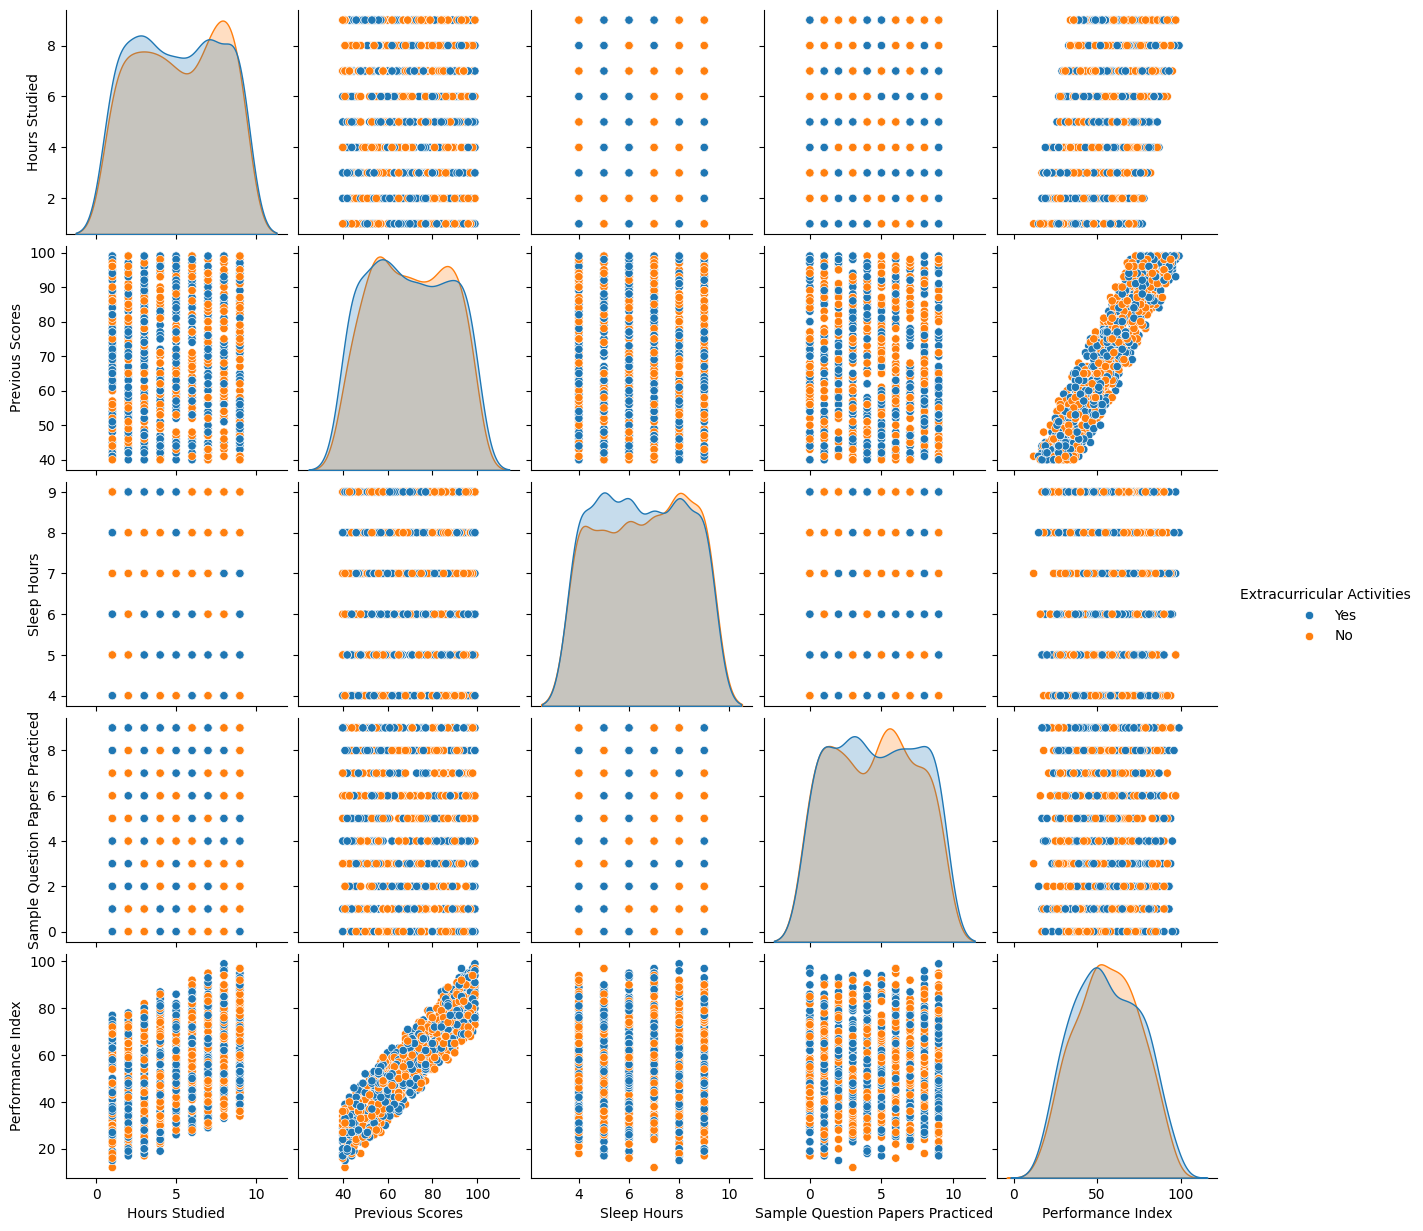

In [8]:
# Pairplot to check relationships (optional, can be heavy on 10k rows, so sample)
sns.pairplot(df.sample(1000), hue='Extracurricular Activities');

## Data Preprocessing

- **Encoding:** Convert categorical ‘Extracurricular Activities’ feature to binary (Yes=1, No=0) using map function for model compatibility.  
- **Feature/target split:** Separate predictors and response variable.  
- **Train-test split:** 80-20 split ensures models generalize well; `random_state=42` for reproducibility.

Handling categorical variables properly ensures models interpret the data correctly. Train-test splitting is vital for unbiased performance evaluation.


In [9]:
# Encode 'Extracurricular Activities' as binary
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

# Verify encoding worked correctly
print(df['Extracurricular Activities'].value_counts())

Extracurricular Activities
0    5052
1    4948
Name: count, dtype: int64


In [10]:
# Split features and target
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (8000, 5)
Testing set shape: (2000, 5)


## Multiple Linear Regression Model

Linear regression is a fundamental and interpretable model. It assumes a linear relationship between predictors and the target.

We fit the model on training data and interpret the coefficients to understand the effect of each feature on Performance Index.

---

**Note:** The intercept term represents the baseline Performance Index when all features are zero.


In [11]:
# Train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Display intercept and coefficients
print(f"Intercept: {lr.intercept_:.4f}")

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', ascending=False)

coefficients


Intercept: -33.9219


,Feature,Coefficient
0,Hours Studied,2.852484
1,Previous Scores,1.016988
2,Extracurricular Activities,0.608617
3,Sleep Hours,0.476941
4,Sample Question Papers Practiced,0.191831


## Model Evaluation

To measure regression performance, we use:

- **Mean Absolute Error (MAE):** Average absolute difference between predicted and actual values.  
- **Mean Squared Error (MSE):** Average squared difference; penalizes larger errors.  
- **Root Mean Squared Error (RMSE):** Square root of MSE; interpretable in original units.  
- **R-squared (R²):** Proportion of variance explained by the model (closer to 1 is better).

Evaluating with multiple metrics provides a robust understanding of model accuracy.


MAE: 1.611
MSE: 4.083
RMSE: 2.021
R²: 0.9890


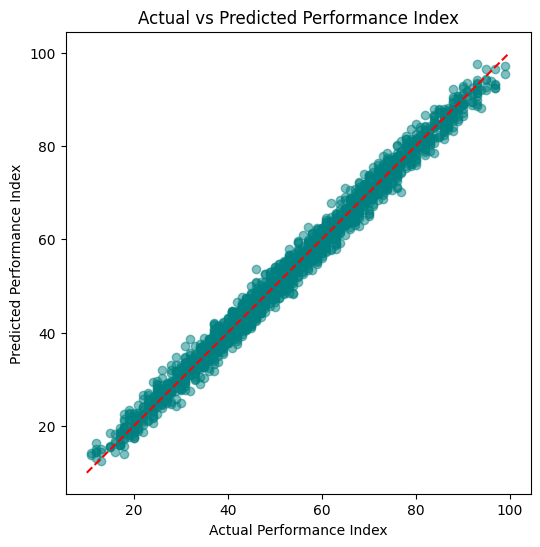

In [12]:
# Predict on test data
y_pred = lr.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.4f}")

# Visualize predictions vs actual
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([10, 100], [10, 100], 'r--')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs Predicted Performance Index')
plt.show()


## Insights and Interpretation

After training the multiple linear regression model, we evaluated it on the test set and achieved the following performance metrics:

- **Mean Absolute Error (MAE):** ~1.61  
- **Root Mean Squared Error (RMSE):** ~2.02  
- **R-squared (R²):** ~0.989  

These results indicate that the model explains nearly 99% of the variance in student performance — a strong indicator of its predictive power.

---

### Feature Impact (Model Coefficients)

| Feature                          | Coefficient | Interpretation |
|----------------------------------|-------------|----------------|
| Hours Studied                    | +2.85       | Each additional hour studied increases the predicted Performance Index by ~2.85 units, holding all else constant. |
| Previous Scores                  | +1.02       | Every point increase in prior test scores boosts performance by ~1.02 units. |
| Extracurricular Activities (Yes=1) | +0.61       | Participation in extracurriculars is associated with a ~0.61 unit increase in performance, suggesting positive impact. |
| Sleep Hours                      | +0.48       | Each extra hour of sleep is associated with better performance (by ~0.48 units). |
| Sample Question Papers Practiced | +0.19       | Practicing more questions improves performance, though with a smaller marginal gain. |

---

### Key Observations

- **Study hours** and **previous scores** are the most influential predictors — reinforcing educational research.
- **Lifestyle factors** (sleep and extracurriculars) have modest but positive contributions, supporting a holistic approach to student success.
- The model’s coefficients are easy to interpret, making it suitable for educational decision-making and policy.

Overall, the regression model provides actionable and explainable insights for both educators and learners.


## Conclusion and Future Work

This project demonstrates how multiple linear regression can be used to predict academic performance with high accuracy and interpretability.

We followed a structured approach:

- Conducted thorough EDA to understand data structure and relationships.
- Preprocessed data by encoding categorical variables and splitting into training/testing sets.
- Built a linear regression model that performs well on unseen data (R² ≈ 0.989).
- Interpreted model coefficients to identify the most impactful predictors of student success.

---

### What Makes This Model Valuable?

- **Simplicity:** The model is transparent and easy to communicate to non-technical stakeholders.
- **Interpretability:** Clear insights into which behaviors drive better performance.
- **Efficiency:** No need for complex modeling or feature engineering in this case.

---

## Next Steps (If Extended Further)

If we were to take this further, potential directions include:

- **Model Deployment:** Build a web dashboard to let students enter their data and receive personalized performance predictions.
- **Feature Expansion:** Include additional variables such as attendance, parental education, or online engagement.
- **Time-Series Analysis:** Track student performance over time to build forecasting models.
- **Statistical Testing:** Apply hypothesis testing to assess significance of coefficients (e.g., p-values, confidence intervals).
